# Import libraries

In [15]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',50)

# Visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%Training
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score

# Data Exploration

In [26]:
im = pd.read_csv('weather_energy.csv')

In [5]:
im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178396 non-null  object 
 1   city_name                                    178396 non-null  object 
 2   temp                                         178396 non-null  float64
 3   temp_min                                     178396 non-null  float64
 4   temp_max                                     178396 non-null  float64
 5   pressure                                     178396 non-null  int64  
 6   humidity                                     178396 non-null  int64  
 7   wind_speed                                   178396 non-null  int64  
 8   wind_deg                                     178396 non-null  int64  
 9   rain_1h                                      178396 non-nul

In [6]:
im.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178301.000000,178306.000000,178306.0,178306.000000,178306.000000,178301.000000,178306.0,178306.0,178306.0,0.0,178301.000000,178301.000000,178306.000000,178301.0,178311.000000,178306.000000,178306.000000,178306.000000,178301.00000,178306.0,178306.000000,178396.000000,0.0,178396.000000,178396.000000,178216.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902,382.999002,448.256890,0.0,5626.254428,4254.162345,298.149651,0.0,0.0,0.0,NaN,475.121143,972.937364,2606.765852,0.0,6263.549316,60.160606,85.744501,1428.437265,269.74819,0.0,5471.050963,1435.289788,NaN,5477.759300,28720.385300,28706.112319,49.921227,57.923472
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223,85.256652,354.297585,0.0,2203.888156,1960.883415,52.464334,0.0,0.0,0.0,NaN,792.399286,400.974209,1835.930904,0.0,839.973970,20.212231,14.072136,1676.555025,50.09136,0.0,3215.408881,1674.115259,NaN,3178.332767,4597.947283,4579.010441,14.625882,14.210251
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000,333.000000,0.000000,0.0,4127.000000,2526.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,638.000000,1079.000000,0.0,5757.000000,53.000000,74.000000,70.000000,241.00000,0.0,2940.000000,69.000000,NaN,2984.000000,24796.000000,24809.000000,41.500000,49.390000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000,366.000000,509.000000,0.0,4972.000000,4473.000000,300.000000,0.0,0.0,0.0,NaN,67.000000,907.000000,2166.000000,0.0,6563.000000,57.000000,88.000000,615.000000,280.00000,0.0,4856.000000,576.000000,NaN,4861.000000,28913.000000,28916.000000,50.560000,58.060000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,430.000000,757.000000,0.0,6435.000000,5836.000000,330.000000,0.0,0.0,0.0,NaN,615.000000,1251.000000,3759.000000,0.0,7025.000000,80.000000,97.000000,2563.000000,310.00000,0.0,7407.000000,2621.000000,NaN,7363.000000,32278.000000,32202.000000,60.600000,68.050000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.00000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


# Data cleaning (Avoid attributes with null)

In [7]:
round((im.isnull().sum()/len(im)*100),2)

time                                             0.00
city_name                                        0.00
temp                                             0.00
temp_min                                         0.00
temp_max                                         0.00
pressure                                         0.00
humidity                                         0.00
wind_speed                                       0.00
wind_deg                                         0.00
rain_1h                                          0.00
rain_3h                                          0.00
snow_3h                                          0.00
clouds_all                                       0.00
weather_id                                       0.00
weather_main                                     0.00
weather_description                              0.00
weather_icon                                     0.00
generation biomass                               0.05
generation fossil brown coal

# Feature correlationship

In [8]:
im.corr()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
temp,1.000000,0.974541,0.966853,-0.008833,-0.573542,0.115307,-0.052199,-0.066632,-0.010022,-0.039008,-0.221331,0.157494,0.035562,0.060444,NaN,0.098760,0.075921,0.098213,NaN,NaN,NaN,NaN,-0.200733,-0.094031,-0.016122,NaN,-0.027666,-0.029561,0.000076,0.380767,0.078189,NaN,-0.125695,0.383305,NaN,-0.126883,0.179700,0.181200,0.061611,0.069932
temp_min,0.974541,1.000000,0.892425,-0.007505,-0.569617,0.113380,-0.041872,-0.071634,-0.003528,-0.035890,-0.208759,0.157292,0.026501,0.057921,NaN,0.103899,0.070676,0.095109,NaN,NaN,NaN,NaN,-0.200461,-0.083967,-0.022264,NaN,-0.035792,-0.035290,0.021759,0.373690,0.086142,NaN,-0.118171,0.375994,NaN,-0.119198,0.178020,0.179328,0.073644,0.080857
temp_max,0.966853,0.892425,1.000000,-0.009710,-0.534234,0.101714,-0.067548,-0.061496,-0.016446,-0.040011,-0.226416,0.149840,0.037321,0.059616,NaN,0.085671,0.074213,0.090992,NaN,NaN,NaN,NaN,-0.187952,-0.097980,-0.006460,NaN,-0.017446,-0.023901,-0.021381,0.364353,0.065756,NaN,-0.128128,0.367203,NaN,-0.129384,0.168685,0.170405,0.042390,0.051325
pressure,-0.008833,-0.007505,-0.009710,1.000000,-0.027458,0.001379,0.002265,0.039309,-0.000465,-0.000200,0.004443,-0.004053,0.006566,-0.009407,NaN,-0.007174,-0.009351,-0.002862,NaN,NaN,NaN,NaN,0.008045,0.006282,0.009787,NaN,0.009016,0.010092,-0.009222,-0.003049,-0.012980,NaN,0.010336,-0.003001,NaN,0.010100,-0.000906,-0.000990,-0.009851,-0.007214
humidity,-0.573542,-0.569617,-0.534234,-0.027458,1.000000,-0.250336,-0.029316,0.134445,0.014036,0.023744,0.400483,-0.290514,-0.022922,0.009193,NaN,-0.067029,-0.022854,-0.093322,NaN,NaN,NaN,NaN,0.135608,-0.015607,-0.059711,NaN,0.013120,0.009448,-0.013323,-0.393232,0.002689,NaN,-0.026042,-0.390739,NaN,-0.024132,-0.245748,-0.245296,-0.025828,-0.024741
wind_speed,0.115307,0.113380,0.101714,0.001379,-0.250336,1.000000,0.261888,0.052220,-0.019366,-0.006230,0.051049,-0.042262,-0.022654,-0.096152,NaN,-0.058576,-0.088650,-0.010796,NaN,NaN,NaN,NaN,0.029410,0.103535,0.070773,NaN,0.013945,-0.010507,-0.012568,0.136741,-0.048364,NaN,0.211037,0.137233,NaN,0.210601,0.125179,0.126286,-0.079933,-0.146129
wind_deg,-0.052199,-0.041872,-0.067548,0.002265,-0.029316,0.261888,1.000000,0.039426,0.002445,-0.014599,0.034008,-0.030328,0.016182,-0.072467,NaN,-0.073656,-0.064558,-0.020351,NaN,NaN,NaN,NaN,0.067193,0.053272,0.011599,NaN,0.003441,0.019226,-0.046320,-0.049131,-0.049592,NaN,0.094539,-0.051249,NaN,0.094577,-0.039849,-0.041705,-0.078951,-0.099958
rain_1h,-0.066632,-0.071634,-0.061496,0.039309,0.134445,0.052220,0.039426,1.000000,-0.009862,0.040347,0.229401,-0.461414,0.025411,-0.044544,NaN,-0.035887,-0.026681,0.004391,NaN,NaN,NaN,NaN,0.007115,0.039117,0.036395,NaN,0.021597,0.025908,-0.048473,-0.014371,-0.075450,NaN,0.064244,-0.013872,NaN,0.064044,0.011445,0.012259,-0.035598,-0.035814
rain_3h,-0.010022,-0.003528,-0.016446,-0.000465,0.014036,-0.019366,0.002445,-0.009862,1.000000,-0.001063,0.024327,0.020114,0.038221,-0.002908,NaN,-0.016535,0.009503,0.018493,NaN,NaN,NaN,NaN,-0.001016,0.003958,0.010565,NaN,-0.003753,0.029510,-0.047161,0.001884,-0.043109,NaN,0.000168,0.002119,NaN,0.000262,-0.002777,-0.003210,-0.014641,-0.009344
snow_3h,-0.039008,-0.035890,-0.040011,-0.000200,0.023744,-0.006230,

In [9]:
# Correlation of columns to target variable 
correlations = im.corr(method='pearson')
print(correlations['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.730636
generation fossil hard coal                    0.463768
generation fossil gas                          0.461567
total load actual                              0.436263
total load forecast                            0.435944
generation fossil brown coal/lignite           0.362119
generation fossil oil                          0.283570
generation other renewable                     0.257654
generation waste                               0.170182
generation biomass                             0.139684
forecast solar day ahead                       0.100664
generation other                               0.099534
generation solar                               0.097720
temp_min                                       0.080857
generation hydro water reservoir               0.072349
temp                                           0.069932
temp_max                                       0

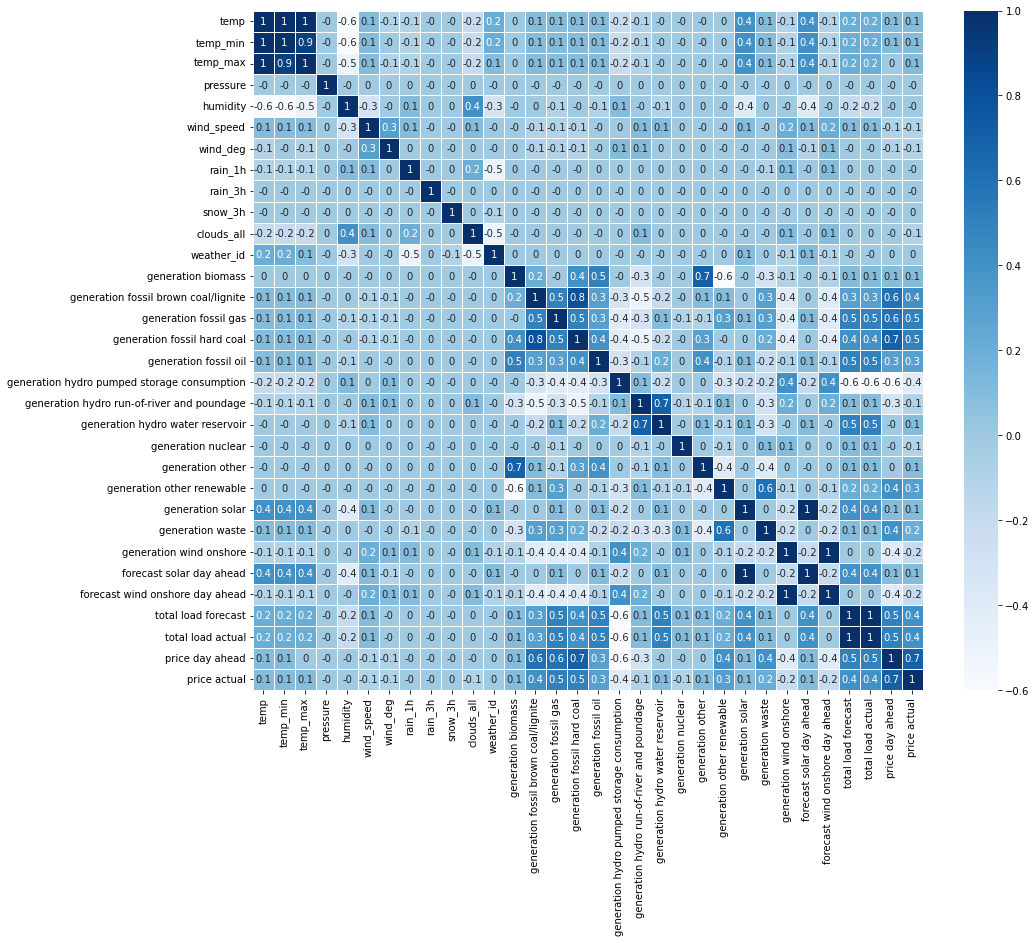

In [10]:
# Assign Variable to drop columns
zero_val_cols = ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'forecast wind offshore eday ahead',
                 'generation fossil coal-derived gas',
                 'generation hydro pumped storage aggregated']
# Drop Columns with zero values
heat_map_features = im.drop(columns=zero_val_cols,axis=1)

# Set Figure Size
plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(heat_map_features.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show();

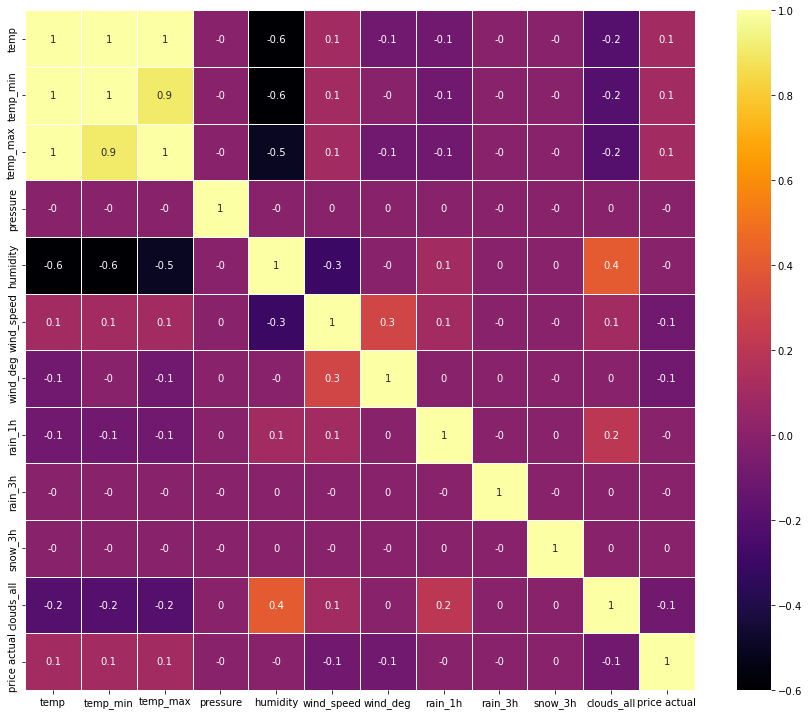

In [33]:
# Assign Non weather related Variable to drop columns
not_weather_features_cols = ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'forecast wind offshore eday ahead',
                 'generation fossil coal-derived gas',
                 'generation hydro pumped storage aggregated',
                 'weather_id',
                  'generation fossil brown coal/lignite',
                  'generation biomass',
                  'generation fossil gas',
                  'generation fossil hard coal',
                  'generation fossil oil',
                  'generation hydro pumped storage consumption',
                  'generation hydro run-of-river and poundage',
                  'generation hydro water reservoir',
                  'generation nuclear',
                  'generation other',
                  'generation other renewable',
                  'generation solar',
                  'generation waste',
                  'generation wind onshore',
                  'total load actual',
                    'price day ahead',
                     'total load forecast',
                     'forecast solar day ahead',
                     'forecast wind onshore day ahead']
# Drop Columns with zero values
heat_map_weather_features = im.drop(columns=not_weather_features_cols,axis=1)

# Set Figure Size
plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(heat_map_weather_features.corr(),1),annot=True,cmap='inferno',linewidth=0.9)
plt.show();

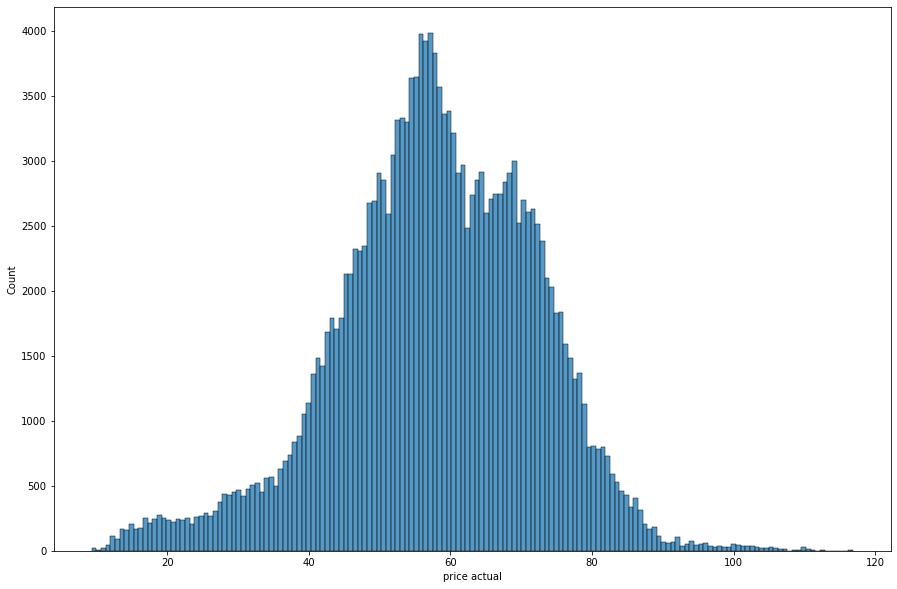

In [11]:
# Figure Size
plt.figure(figsize=(15,10))

# Hist graph to show distribution of target variable
sns.histplot(im,x='price actual');

# Feature selection

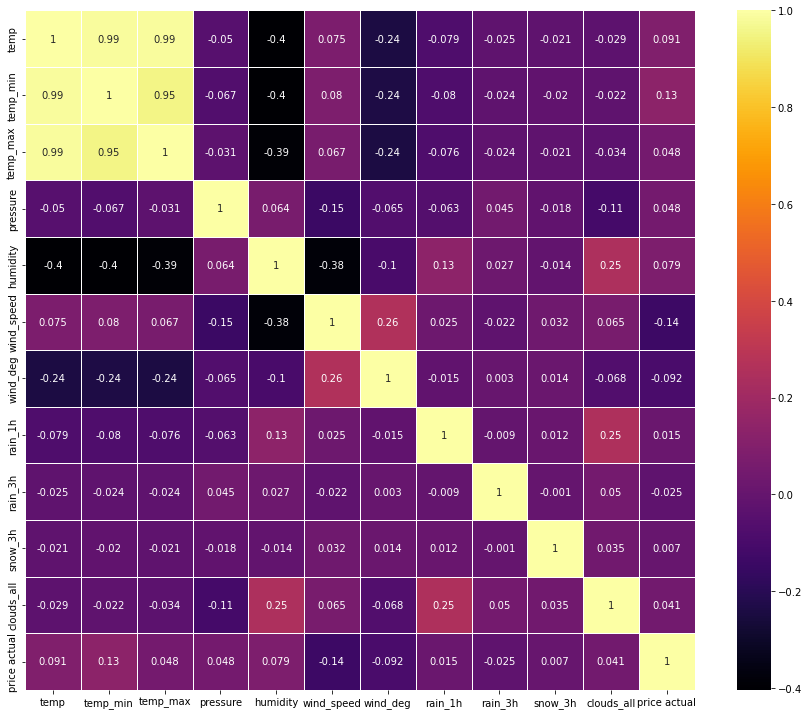

In [5]:
df = pd.read_csv('weather_energy.csv',parse_dates=['time'],index_col='time')

df.index = pd.to_datetime(df.index, utc=True)  

# Drop Outlier row 2014 for plotting
df = df.drop(pd.Timestamp('2014-12-31 23:00:00+00:00')) 

# Sort index
df = df.sort_index()


dataset = df.loc[df['city_name']=='Valencia']
dataset = dataset.drop(columns=['city_name',
                      'weather_id',
                      'weather_main',
                      'weather_description',
                      'weather_icon',
                      'generation fossil brown coal/lignite',
                      'generation biomass',
                      'generation fossil gas',
                      'generation fossil hard coal',
                      'generation fossil oil',
                      'generation hydro pumped storage consumption',
                      'generation hydro run-of-river and poundage',
                      'generation hydro water reservoir',
                      'generation nuclear',
                      'generation other',
                      'generation other renewable',
                      'generation solar',
                      'generation waste',
                      'generation wind onshore',
                      'total load actual',
                    'price day ahead',
                     'generation marine',
                     'total load forecast',
                     'generation geothermal',
                     'generation fossil peat',
                     'generation wind offshore',
                     'forecast solar day ahead',
                     'generation fossil oil shale',
                     'forecast wind onshore day ahead',
                     'forecast wind offshore eday ahead',
                     'generation fossil coal-derived gas',
                     'generation hydro pumped storage aggregated'])

#Dataset selected correlation
# Set Figure Size
plt.figure(figsize=(15,12.5))

# .corr heatmap of df to visualize correlation & show plot
sns.heatmap(round(dataset.corr(),3),annot=True,cmap='inferno',linewidth=0.9)
plt.show();

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35144 entries, 2015-01-01 00:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          35144 non-null  float64
 1   temp_min      35144 non-null  float64
 2   temp_max      35144 non-null  float64
 3   pressure      35144 non-null  int64  
 4   humidity      35144 non-null  int64  
 5   wind_speed    35144 non-null  int64  
 6   wind_deg      35144 non-null  int64  
 7   rain_1h       35144 non-null  float64
 8   rain_3h       35144 non-null  float64
 9   snow_3h       35144 non-null  float64
 10  clouds_all    35144 non-null  int64  
 11  price actual  35144 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 3.5 MB


# Divide Train and Test Sets

In [6]:
target = 'price actual'
dataset.shape

(35144, 12)

In [7]:
# Split data into feature matrix and target vector
y,x=dataset[target],dataset.drop(columns=target)
# split data into train / validation sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [14]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(8786, 11)
(26358, 11)
(8786,)
(26358,)


# Scaling weather features

In [16]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Hyperparameter tuning (Random Forest)

In [17]:
model = RandomForestRegressor(random_state = 42)
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 14, 'bootstrap': True}


# Train Prediction Model

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=30, min_samples_split=10, 
                              min_samples_leaf=3, max_depth=14, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[61.0249624  59.80797229 74.63844152 ... 36.78378229 61.28037387
 56.56979318]
(8786,)


# Result Evaluation

In [16]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 
# calculate precision
print("Calculation based on threshold mean price:")
# threshold value
mean = np.mean(y_test)
mean_pred = np.mean(predict)
threshold = round(((mean+mean_pred)/2),2)

# convert continuous values to classes
y_test_class = [1 if x >= threshold else 0 for x in y_test]
y_pred_class = [1 if x >= threshold else 0 for x in predict]
precision = precision_score(y_test_class, y_pred_class)
print('Precision: %.3f' % precision)
# calculate recall
recall = recall_score(y_test_class, y_pred_class)
print('Recall: %.3f' % recall)
# calculate F1 score
f1 = f1_score(y_test_class, y_pred_class)
print('F1 score: %.3f' % f1)

Mean Absolute Error: 8.7236
Mean Squared Error: 123.5685
Root Mean Squared Error: 11.1161
(R^2) Score: 0.3814
Train Score : 56.11% and Test Score : 38.14% using Random Tree Regressor.
Accuracy: 82.02 %.
Calculation based on threshold mean price:
Precision: 0.661
Recall: 0.794
F1 score: 0.722


# Prediction of future(1 week, 1 month, 1 year)

In [21]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:365])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:30])
onemonth_df.to_csv("one-month-predictions.csv")
oneweek_df = pd.DataFrame(predictions[:7])
oneweek_df.to_csv("one-week-predictions.csv")

Min electricity price and date
                           Predictions
date                                  
2019-07-15 22:00:00+00:00    22.304164
Max electricity price and date
                           Predictions
date                                  
2019-03-23 22:00:00+00:00    79.131194


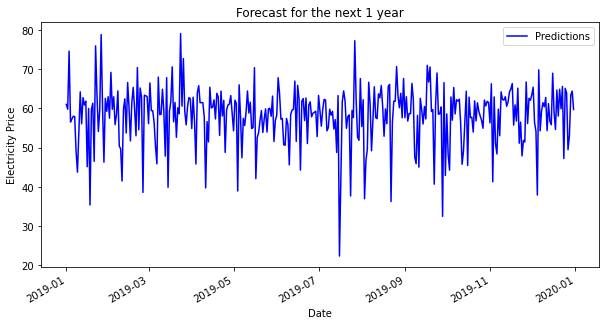

In [22]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
oneyear_df_pred['date'] = pd.to_datetime(oneyear_df_pred['date'])
oneyear_df_pred.set_index('date', inplace=True)
year_low_price = min(oneyear_df_pred["Predictions"])
year_max_price = max(oneyear_df_pred["Predictions"])
oneyear_low_price = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == year_low_price]
oneyear_max_price = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == year_max_price]
print("Min electricity price and date")
print(oneyear_low_price)
print("Max electricity price and date")
print(oneyear_max_price)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Electricity Price")
plt.legend()
plt.show()

Min electricity price and date
                           Predictions
date                                  
2019-01-17 22:00:00+00:00    35.344811
Max electricity price and date
                           Predictions
date                                  
2019-01-25 22:00:00+00:00    78.856767


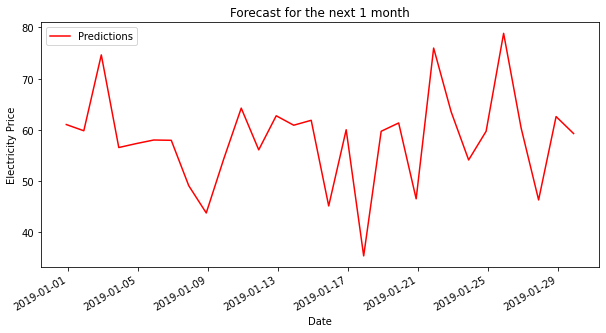

In [7]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
onemonth_df_pred['date'] = pd.to_datetime(onemonth_df_pred['date'])
onemonth_df_pred.set_index('date', inplace=True)
month_low_price = min(onemonth_df_pred["Predictions"])
month_max_price = max(onemonth_df_pred["Predictions"])
onemonth_low_price = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == month_low_price]
onemonth_max_price = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == month_max_price]
print("Min electricity price and date")
print(onemonth_low_price)
print("Max electricity price and date")
print(onemonth_max_price)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="red")
plt.xlabel("Date")
plt.ylabel("Electricity Price")
plt.legend()
plt.show()

Min electricity price and date
                           Predictions
date                                  
2019-01-03 22:00:00+00:00    56.532961
Max electricity price and date
                           Predictions
date                                  
2019-01-02 22:00:00+00:00    74.638442


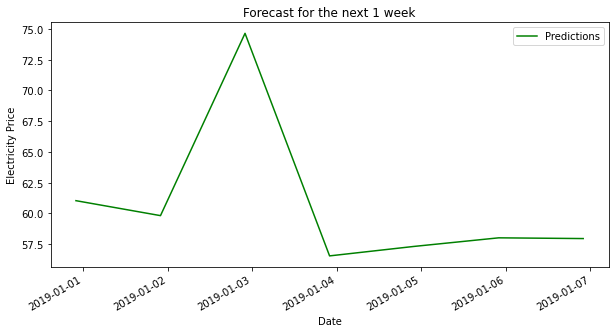

In [8]:
oneweek_df_pred = pd.read_csv("one-week-predictions.csv")
oneweek_df_pred.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
oneweek_df_pred['date'] = pd.to_datetime(oneweek_df_pred['date'])
oneweek_df_pred.set_index('date', inplace=True)
low_price = min(oneweek_df_pred["Predictions"])
max_price = max(oneweek_df_pred["Predictions"])
oneweek_low_price = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == low_price]
oneweek_max_price = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == max_price]
print("Min electricity price and date")
print(oneweek_low_price)
print("Max electricity price and date")
print(oneweek_max_price)
oneweek_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 week", color="green")
plt.xlabel("Date")
plt.ylabel("Electricity Price")
plt.legend()
plt.show()